**Problem Understanding and Model Selection**

1. Problem Type: Classification
2. Problem: Sentiment Analysis

* The goal of this project is to perform sentiment analysis by classifying text data into sentiment categories such as positive or negative. Since the output variable is a categorical label, this problem is treated as a classification problem.

* To solve this problem, multiple classification models are considered. Naive Bayes is used because it performs well on text data and works efficiently with word-based features. Random Forest is applied because it combines multiple decision trees and is able to capture complex patterns in the text features.

* XGBoost is used because it is a boosting algorithm that improves sentiment classification accuracy by learning from errors of previous models, making it suitable for achieving higher performance on text classification tasks.

Dataset we will used Social Media Usage and Emotional Well-Being
https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being/

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df=pd.read_csv('../Dataset/train.csv')
df_test = pd.read_csv("../Dataset/test.csv")



In [3]:
# Final dataset
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


#### **Perform the EDA**

In [4]:
# Check the shape
print(f'EDA.....\n{'='*100}')
print(f'Shape is :\n{df.shape}\n{'='*100}')
print(f'{df.info()}\n{'='*100}') # info check
print(f'{df.describe()}\n{'='*100}')
print(f'{df.isna().sum()}\n{'='*100}')

EDA.....
Shape is :
(1001, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB
None
       Daily_Usage_Time (minutes)  Posts_Per_Day  Likes_Received_Per_Day  \
count                 1000.000000    1000.00

conclusion:
* Here are the 1104 rows and 10 columns
* The User_ID and Age datatype are wrong
* The dataset shows moderate to high daily social media usage with increasing engagement levels, indicating that user activity features can be effectively used to predict dominant emotional states.
* Here are a only 1 missing values we will drop it

In [5]:
# Check the unique values of each feature
for col in df.columns:
    print('Unique values of :',col)
    print(f'{df[col].unique()}\n{'='*100}')

# Check the unique values of each feature
for col in df.columns:
    print('Unique values of :',col)
    print(f'{df[col].value_counts(normalize=True)*100}\n{'='*100}')

Unique values of : User_ID
['1' '2' '3' ... '998' '999' '1000']
Unique values of : Age
['25' '30' '22' '28' '33' '21' '27' '24' '29' '31' '23' '26' '34' '35'
 '32' 'Male' 'Female' 'Non-binary'
 ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:']
Unique values of : Gender
['Female' 'Male' 'Non-binary' '27' '24' '29' '33' '31' '22' '25' '28' '30'
 '23' '34' '26' '35' '21' '32' nan]
Unique values of : Platform
['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat' nan]
Unique values of : Daily_Usage_Time (minutes)
[120.  90.  60. 200.  45. 150.  85. 110.  55. 170.  75.  95.  65. 180.
 100.  40. 125.  50. 140. 105. 190.  70.  80. 160. 145. 130. 115. 175.
 165. 155.  nan]
Unique values of : Posts_Per_Day
[ 3.  5.  2.  8.  1.  4.  6.  7. nan]
Unique values of : Likes_Received_Per_Day
[ 45.  20.  15. 100.   5.  60.  30.  25.  10.  80.  35.  12.  90.  40.
  55.  33.   8.  70.  28.  11.  95.  18.   9.  85.  38.   6.  13.  75.
  27.  88.  22.  78.  29.  50.  36.  72. 

Overall conclsion

* User_ID → numeric, no issues.

* Age and Gender → need data cleaning.

* Platform and other numeric columns → clean, ready for preprocessing.

* Dominant_Emotion → target, encode as labels for modeling.

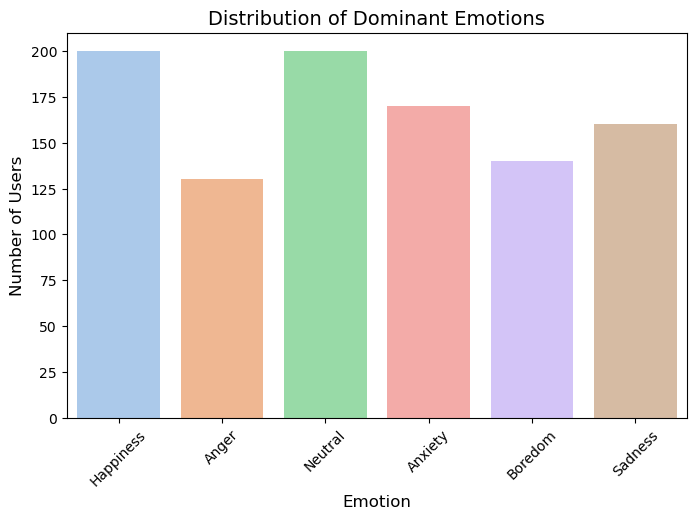

In [6]:
# Count plot for Dominant_Emotion
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Dominant_Emotion', palette='pastel',)
plt.title('Distribution of Dominant Emotions', fontsize=14)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)
plt.show()

conclusion:“The count plot shows that most users are in Neutral or Happy states, while fewer users are Angry or Bored, giving insight into the distribution of dominant emotions.”

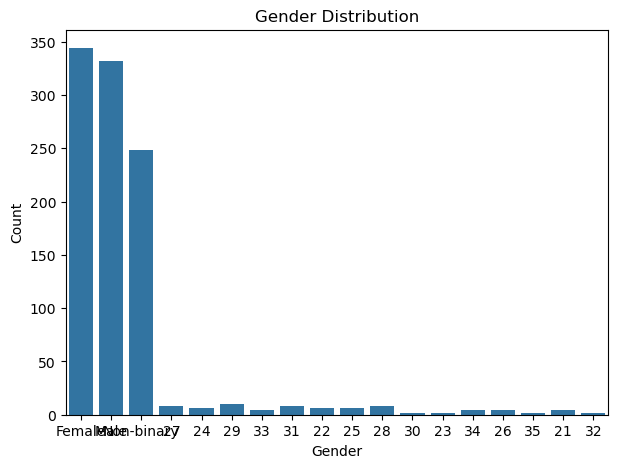

In [7]:
# Plot gender distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

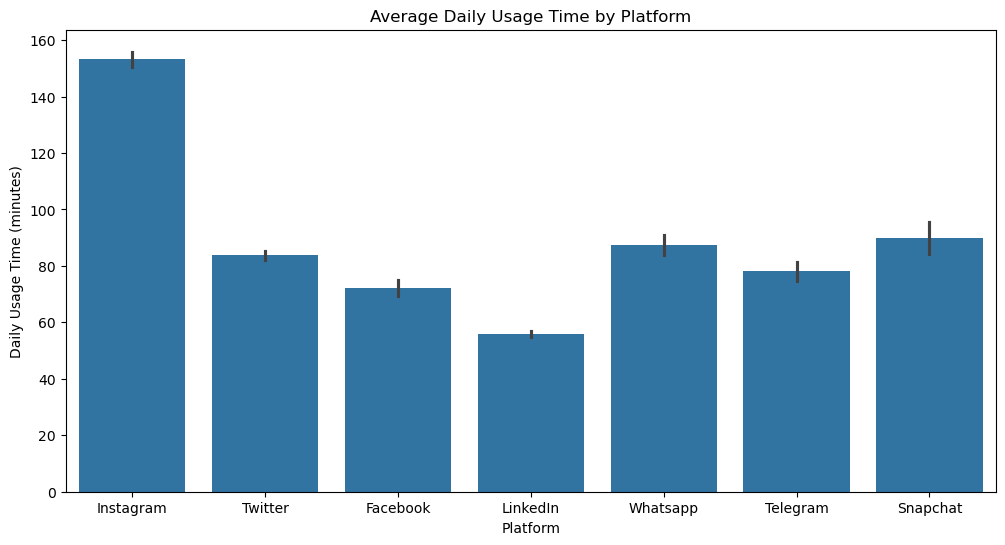

In [8]:
# Plot average daily usage time by platform
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=df, estimator=np.mean)
plt.title('Average Daily Usage Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Daily Usage Time (minutes)')
plt.show()

### **Clean the dataset**


In [10]:
# Handle the missing values\
df=df.dropna()
# Recheck their are missing value present or not
df.isna().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [11]:
def clean_dataset(df, age_median, gender_mode):
    """
    Cleans the social media sentiment dataset.
    
    Parameters:
    df (DataFrame): Input dataset (train or test)
    age_median (float): Median age computed from TRAIN data
    gender_mode (str): Most frequent gender from TRAIN data
    
    Returns:
    DataFrame: Cleaned dataset
    """
    
    df = df.copy()

    # Drop User_ID (not useful for modeling)
    df.drop('User_ID', axis=1, inplace=True, errors='ignore')

    # ---- Age Cleaning 
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df['Age'].fillna(age_median, inplace=True)
    df['Age'] = df['Age'].astype(int)

    # ---- Gender Cleaning 
    valid_genders = ['Male', 'Female', 'Non-binary']
    df['Gender'] = df['Gender'].where(
        df['Gender'].isin(valid_genders), pd.NA
    )
    df['Gender'].fillna(gender_mode, inplace=True)

    return df


In [12]:
age_median = pd.to_numeric(df['Age'], errors='coerce').median()
gender_mode = df.loc[
    df['Gender'].isin(['Male', 'Female', 'Non-binary']), 'Gender'
].mode()[0]


In [13]:
# CLean the Train dataset
df_train_clean = clean_dataset(df, age_median, gender_mode)

# Clean the Test datset
df_test_clean = clean_dataset(df_test, age_median, gender_mode)


In [14]:
df_train_clean.head()

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [15]:
df_test_clean.head()

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,27,Female,Snapchat,120,4,40,18,22,Neutral
1,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,27,Male,Telegram,105,3,48,20,28,Anxiety
4,21,Non-binary,Facebook,55,3,17,7,12,Neutral


In [16]:
# save the Clean dataset
df_train_clean.to_csv('../Dataset/clean_train_data.csv', index=False)
df_test_clean.to_csv('../Dataset/clean_test_data.csv', index=False)


#### Feature Engineering and Model Training
 
 1. Feature Engineering
 
 - **Numeric Features**: 'Age', 'Daily_Usage_Time (minutes)', 'Number_of_Friends', etc.
     - Already cleaned and converted to appropriate types.
 - **Categorical Features**: 'Gender', 'Platform'
     - Encode using **Label Encoding** or **One-Hot Encoding** for machine learning models.
 - **Target Variable**: 'Dominant_Emotion'
    - Encode target labels using **LabelEncoder**.

In [17]:
# Load the dataset
df_train=pd.read_csv('../Dataset/clean_train_data.csv')
df_test = pd.read_csv("../Dataset/clean_test_data.csv")



In [18]:
# Train dataset
df_train.head()

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit on train
df_train['Dominant_Emotion'] = le.fit_transform(df_train['Dominant_Emotion'])

# Apply same mapping to test
df_test['Dominant_Emotion'] = le.transform(df_test['Dominant_Emotion'])




 ### 1. Train-Test Split
- Split the dataset into **features (X)** and **target (y)**.
- Use `train_test_split` to create **training and validation sets**.

In [20]:
#  Split features and target ---
X = df_train.drop('Dominant_Emotion', axis=1)
y = df_train['Dominant_Emotion']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
# Identify categorical and numerical columns 
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()


#### **Model Train**

In [23]:
# Important libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
# --- Step 3: ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

#### Performance metrix function


In [25]:
def get_performance_metrics(y_true, y_pred):
    
    metrics = {
        "accuracy": accuracy_score(y_true, y_pred),
        "confusion_matrix": confusion_matrix(y_true, y_pred), 
        "classification_report": classification_report(y_true, y_pred,output_dict=True)  
    }
    
    return metrics

In [26]:
# --- Define models ---
models = {
    "Naive Bayes": GaussianNB(),

    "Random Forest": RandomForestClassifier(n_estimators=100,      # Number of trees
                                            max_depth=None,       # Tree depth
                                            random_state=42),

    "XGBoost": XGBClassifier(objective='binary:logistic',  # Use multi:softmax for multi-class
                            n_estimators=100,             # Number of trees
                            learning_rate=0.1,            
                            max_depth=3,                  # Maximum depth of a tree
                            random_state=42)
}

In [27]:
results = {}
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Get metrics
    results[name] = get_performance_metrics(y_test, y_pred)

In [28]:
# --- Loop through results dictionary ---
for model_name, metrics in results.items():
    print(f"\n{'='*30}\nModel: {model_name}\n{'='*30}")
    print(f"Accuracy: {metrics['accuracy']}\n")
    
    
    print(f'Confusion_matrix: \n{metrics['confusion_matrix']}')
        
    
    print("\nClassification Report:")
    report = metrics['classification_report']
    # Print precision, recall, f1-score for each class
    for cls, cls_metrics in report.items():
        if cls not in ['accuracy', 'macro avg', 'weighted avg']:
            print(f"Class {cls}: Precision={cls_metrics['precision']:.2f}, "
                  f"Recall={cls_metrics['recall']:.2f}, F1-Score={cls_metrics['f1-score']:.2f}")



Model: Naive Bayes
Accuracy: 0.425

Confusion_matrix: 
[[22  0  3  1  0  0]
 [11  0  8 14  0  1]
 [ 5  0 23  0  0  0]
 [ 5  0  0 33  0  2]
 [ 9  0 21  9  0  1]
 [13  0  9  3  0  7]]

Classification Report:
Class 0: Precision=0.34, Recall=0.85, F1-Score=0.48
Class 1: Precision=0.00, Recall=0.00, F1-Score=0.00
Class 2: Precision=0.36, Recall=0.82, F1-Score=0.50
Class 3: Precision=0.55, Recall=0.82, F1-Score=0.66
Class 4: Precision=0.00, Recall=0.00, F1-Score=0.00
Class 5: Precision=0.64, Recall=0.22, F1-Score=0.33

Model: Random Forest
Accuracy: 0.97

Confusion_matrix: 
[[25  0  0  0  0  1]
 [ 0 32  1  1  0  0]
 [ 0  0 28  0  0  0]
 [ 0  0  0 39  1  0]
 [ 0  0  0  0 40  0]
 [ 0  2  0  0  0 30]]

Classification Report:
Class 0: Precision=1.00, Recall=0.96, F1-Score=0.98
Class 1: Precision=0.94, Recall=0.94, F1-Score=0.94
Class 2: Precision=0.97, Recall=1.00, F1-Score=0.98
Class 3: Precision=0.97, Recall=0.97, F1-Score=0.97
Class 4: Precision=0.98, Recall=1.00, F1-Score=0.99
Class 5: Prec

#### **Evaluate on Final Test Data**

In [29]:
# Features and target
X_full = df_train.drop('Dominant_Emotion', axis=1)
y_full = df_train['Dominant_Emotion']

# Final pipeline
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softmax',
        num_class=len(y_full.unique()),
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

# Train on full data
final_pipeline.fit(X_full, y_full)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Daily_Usage_Time (minutes)',
                                                   'Posts_Per_Day',
                                                   'Likes_Received_Per_Day',
                                                   'Comments_Received_Per_Day',
                                                   'Messages_Sent_Per_Day']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Platform'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, cal...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None, num_class=6, ...))])

In [30]:
X_new = df_test.drop('Dominant_Emotion', axis=1, errors='ignore')
y_new=df_test['Dominant_Emotion']

In [31]:
y_new_pred = final_pipeline.predict(X_new)


Evaluate the Perforam

In [32]:
y_true_test = df_test['Dominant_Emotion']

test_metrics = get_performance_metrics(y_true_test, y_new_pred)

print("Final Test Accuracy:", test_metrics["accuracy"])
print("\nConfusion Matrix:\n", test_metrics["confusion_matrix"])
print("\nClassification Report:")
print(pd.DataFrame(test_metrics["classification_report"]).T)


Final Test Accuracy: 0.9514563106796117

Confusion Matrix:
 [[ 9  0  0  0  0  0]
 [ 0 21  0  1  0  0]
 [ 0  0 15  0  0  1]
 [ 0  0  0 14  0  0]
 [ 0  0  1  0 27  0]
 [ 0  0  1  1  0 12]]

Classification Report:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000    9.000000
1              1.000000  0.954545  0.976744   22.000000
2              0.882353  0.937500  0.909091   16.000000
3              0.875000  1.000000  0.933333   14.000000
4              1.000000  0.964286  0.981818   28.000000
5              0.923077  0.857143  0.888889   14.000000
accuracy       0.951456  0.951456  0.951456    0.951456
macro avg      0.946738  0.952246  0.948313  103.000000
weighted avg   0.954279  0.951456  0.951804  103.000000


###  Final Model Conclusion

The final XGBoost pipeline achieved a **high test accuracy of 95.15%**, indicating strong predictive performance.  
The confusion matrix shows that most predictions are correctly classified, with very few misclassifications.  
Precision, recall, and F1-scores are consistently high across all emotion classes, showing balanced performance.  

Overall, the model is **robust, reliable, and well-suited** for predicting dominant emotional states based on social media usage data.
